# Preparation

In [1]:
import pandas as pd

In [2]:
file = "Data/myopia.csv"
df = pd.read_csv(file)
df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df2 = df.drop(['MYOPIC'], axis='columns')
df2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

In [5]:
df2.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [6]:
scaled = pd.DataFrame(scaled_data, columns=df2.columns)
scaled.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


# Dimensionality Reduction 

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
m_pca = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(m_pca)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [25]:
m_pca.shape

(618, 10)

In [10]:
pca_df = pd.DataFrame(data=m_pca, columns=["principal component 1", "principal component 2", 
                                                       "principal component 3", "principal component 4", 
                                                       "principal component 5", "principal component 6", 
                                                       "principal component 7", "principal component 8", 
                                                       "principal component 9", "principal component 10"])
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


## How were number of features changed?
THe number of features was reduced from 14 to 10 when we set the variance to 90%

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(m_pca)

/Users/ajdomingo/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [12]:
tsne_df = pd.DataFrame()
tsne_df["x"] = transformed_features[:,0]
tsne_df["y"] = transformed_features[:,1]

tsne_df["class"] = df["MYOPIC"]

tsne_df.head()

,x,y,class
0,-17.751625,2.793808,1
1,-3.210242,-5.922693,0
2,15.927712,19.324112,0
3,3.604144,-14.695406,1
4,-2.660144,15.437193,0


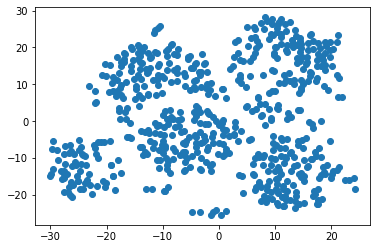

In [13]:
import matplotlib.pyplot as plt
plt.scatter(tsne_df["x"], tsne_df["y"])
plt.show()

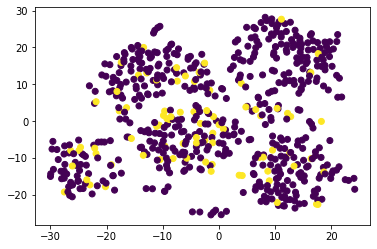

In [14]:
plt.scatter(tsne_df["x"], tsne_df["y"], c=tsne_df["class"])
plt.show()

## Are there distinct clusters?
We can see here there may be 5 distinct clusters in this visualization

# K-means Cluster Analysis

In [31]:
from sklearn.cluster import KMeans

inertia = []
k = [1,2,3,4,5,6,7,8,9,10]
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,234077.487563
1,2,126281.996310
2,3,93178.921127
3,4,78306.115708
4,5,67315.950891
5,6,60220.039637
6,7,54488.791258
7,8,50474.771543
8,9,47681.085581
9,10,45013.131627


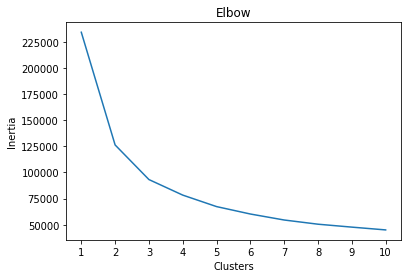

In [32]:
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow')
plt.show()

In [33]:
model = KMeans(n_clusters=3, random_state=5)
model.fit(pca_df)
predictions = model.predict(pca_df)
print(predictions)

[1 2 1 1 2 1 1 1 2 1 0 2 1 2 2 2 2 2 0 1 1 1 1 0 2 1 2 2 2 2 1 0 2 1 2 2 0
 2 1 2 1 2 0 2 1 2 0 2 2 2 1 1 1 1 2 1 2 2 1 1 2 2 2 2 0 2 1 2 2 1 0 2 0 0
 2 2 2 0 1 1 1 1 1 2 1 2 0 0 2 2 2 1 2 2 1 0 1 2 2 2 0 1 0 1 0 0 1 1 1 1 0
 1 2 2 1 1 2 1 2 1 1 1 2 2 0 0 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 2 1 2 1 2 1 2
 2 0 1 1 0 2 1 1 1 2 2 2 1 1 2 2 2 2 0 1 2 1 2 1 0 1 1 2 2 1 1 2 2 0 1 2 2
 0 1 1 2 2 2 2 2 2 1 0 1 2 1 1 1 1 2 1 2 1 1 2 1 2 0 2 2 1 1 2 0 1 2 1 2 1
 0 1 1 0 0 2 1 2 0 2 1 0 2 2 1 1 2 2 0 1 1 1 1 1 2 1 0 1 2 0 1 0 2 1 1 1 2
 1 2 1 1 2 1 2 1 2 1 1 2 2 2 0 2 1 1 1 0 1 2 0 2 0 2 2 2 0 1 2 1 1 2 1 0 1
 1 1 0 1 1 2 1 0 2 2 0 1 1 0 1 1 1 2 1 1 1 2 1 0 2 1 2 0 1 1 1 1 2 2 1 2 1
 1 1 1 2 2 1 1 1 2 1 1 2 1 1 2 0 2 1 1 1 1 2 2 1 2 1 2 1 2 1 1 1 1 1 2 2 1
 2 2 2 1 0 2 2 1 1 2 0 1 2 2 2 0 1 0 2 0 1 0 2 1 2 1 2 1 2 2 2 1 2 0 0 1 2
 0 2 2 2 2 1 2 1 1 1 2 2 1 0 0 1 1 0 2 2 0 1 2 0 2 1 1 1 1 1 0 1 0 1 1 1 0
 2 1 2 1 1 2 0 0 2 0 1 2 2 1 2 2 1 2 1 1 0 2 1 0 1 0 1 0 2 1 0 2 1 2 1 2 1
 1 2 0 2 2 1 0 2 0 0 1 1 

In [34]:
pca_df["class"] = model.labels_
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


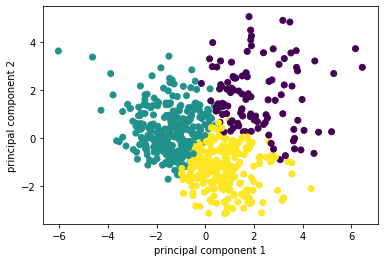

In [35]:
plt.scatter(x=pca_df['principal component 1'], y=pca_df['principal component 2'], c=pca_df["class"])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [37]:
pca_df['class'].value_counts()

1    274
2    235
0    109
Name: class, dtype: int64

# Recommendation

After running the analysis, we see that principal components using tSNE were reduced further from 10 to 2. Looking at the elbow curve, I would recommend 3 components becuase that is the point of where the data begins to stabalize.